## Working with the Models

Inputs:
* SOLDPRICE - float
* DOM - int
* BEDS - int
* BATHS - float
* SQFT - int
* AGE - int
* GARAGE - int
* PROPTYPE_CAT - int
* STYLE_CAT - int
* ZIP_CAT - int
* SOLDDATE_CAT - int

Out:
* FLIPPABLE - bool

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import joblib
from imblearn.over_sampling import SMOTE

In [299]:
df = pd.read_csv('./outputs/merged_test_and_control_data.csv') 

In [300]:
df.shape

(133375, 14)

In [301]:
df.head()

,Unnamed: 0,FLIPPABLE,MLSNUM,SOLDPRICE,DOM,BEDS,BATHS,SQFT,AGE,GARAGE,PROPTYPE_CAT,STYLE_CAT,ZIP_CAT,SOLDDATE_CAT
0,0,True,71425748,50000.0,1077,4,2.0,1984,95,0,2,458,168,735998
1,1,True,71477127,125000.0,724,4,2.0,2333,67,0,0,1,207,736018
2,2,True,71478495,720500.0,828,4,3.5,4196,20,3,0,3,313,735978
3,3,True,71485790,160000.0,1140,3,1.5,1350,58,0,0,6,71,736215
4,4,True,71614526,335000.0,809,3,2.0,1270,38,1,0,6,111,736024


In [302]:
df = df.drop(df.columns[0],axis=1)

In [303]:
# mix it up randomly
df = df.sample(frac=1)

In [304]:
df.head()

,FLIPPABLE,MLSNUM,SOLDPRICE,DOM,BEDS,BATHS,SQFT,AGE,GARAGE,PROPTYPE_CAT,STYLE_CAT,ZIP_CAT,SOLDDATE_CAT
90620,False,72104816,220000.0,1,3,2.0,1876,47,2,0,12,319,736388
129619,True,72215642,529000.0,17,4,2.5,2804,13,2,0,3,321,736600
72167,False,72168709,275000.0,17,3,2.0,1712,67,2,0,3,364,736541
12400,False,72020322,274000.0,42,3,2.0,1714,70,1,0,1,329,736219
93462,False,72074482,675000.0,2,3,3.0,2722,24,2,0,1,80,736314


In [305]:
df.SOLDPRICE.describe()

count    1.333750e+05
mean     4.562606e+05
std      4.390886e+05
min      1.000000e+00
25%      2.500000e+05
50%      3.640000e+05
75%      5.300000e+05
max      4.550000e+07
Name: SOLDPRICE, dtype: float64

# Learning About Our Data

Ok, everything is loaded in, let's play!

First: this is a classification problem, we are classifying houses as FLIPPABLE 0 or 1. I want to see which of our continuous predictors affect whether a house is flippable or not, as well as see any relationships between the predictors themselves. Scatter matrix is helpful with that.

In [306]:
# Define label and features
y_names = ['FLIPPABLE']

# comment here to test with different combos of features!
x_names = ['SOLDPRICE', 'DOM', 'BEDS', 'BATHS', 'SQFT', 'AGE', 'GARAGE', 'PROPTYPE_CAT', 'STYLE_CAT', 'ZIP_CAT', 'SOLDDATE_CAT']

y = df[y_names]
x = df[x_names]

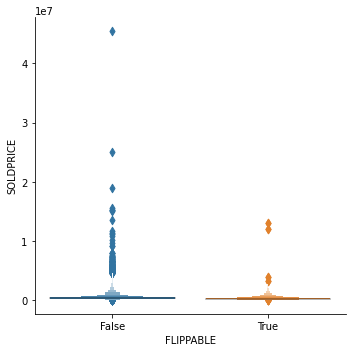

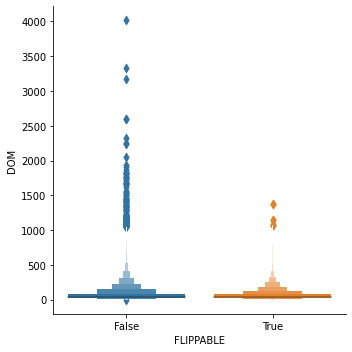

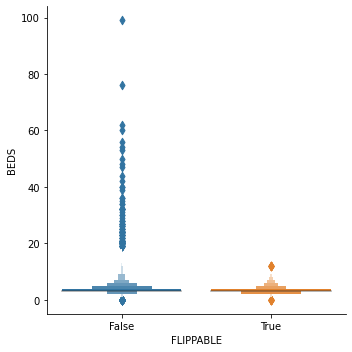

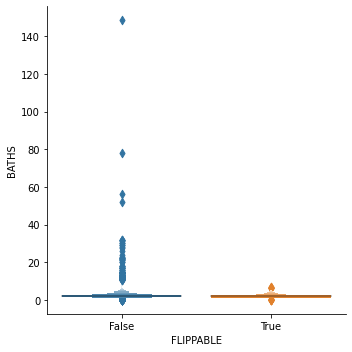

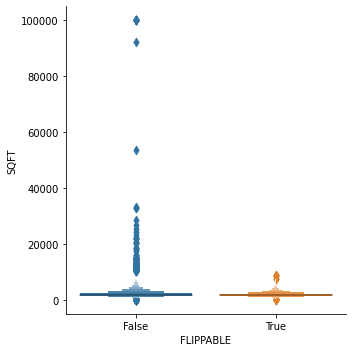

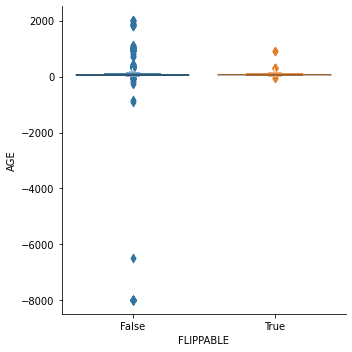

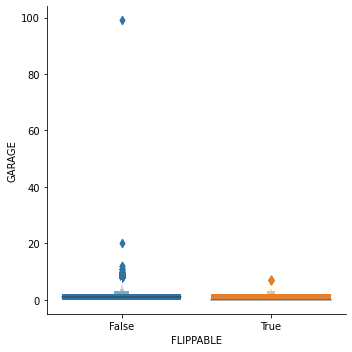

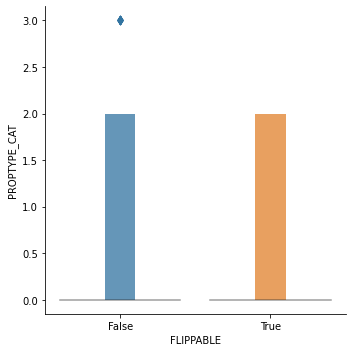

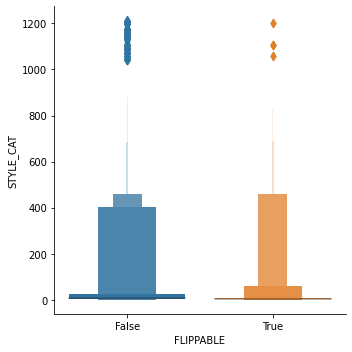

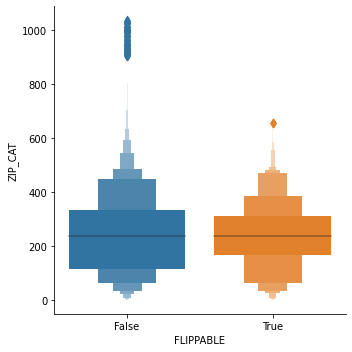

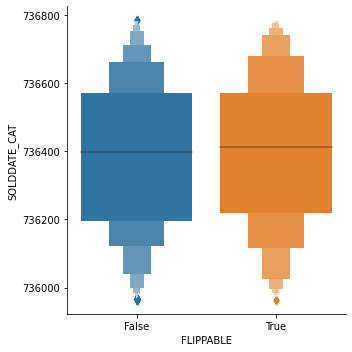

In [307]:
# Make boxplots so we can see the shape of our data a bit better, and catch outliers
# https://seaborn.pydata.org/tutorial/categorical.html

for i in range(0, len(x_names)):
    sns.catplot(x="FLIPPABLE", y=x_names[i], kind="boxen", data=df);

In [308]:
# Looks like we are getting some negative values with age. We'll clean this up in the next version (leaving that for team members)
df.loc[df['AGE'] < 0]

,FLIPPABLE,MLSNUM,SOLDPRICE,DOM,BEDS,BATHS,SQFT,AGE,GARAGE,PROPTYPE_CAT,STYLE_CAT,ZIP_CAT,SOLDDATE_CAT
420,True,71947648,608273.0,41,3,2.5,2086,-68,2,0,85,213,736226
44062,False,72082350,140000.0,330,4,2.0,1472,-7981,0,2,458,480,736662
40441,False,72205606,559000.0,80,4,2.5,2520,-7981,2,0,3,92,736642
15298,False,71980474,185000.0,134,3,2.0,1280,-7981,1,0,3,480,736237
10852,False,72029110,99000.0,3,4,2.0,2190,-172,0,2,458,701,736223
129122,False,71942158,507000.0,161,4,2.5,2430,-7981,1,0,3,84,735992
111936,False,72111244,646665.0,14,3,2.5,2086,-68,2,0,85,213,736615
100871,False,72044555,166000.0,135,4,2.0,1453,-7981,2,0,29,485,736349
104574,False,72061311,651700.0,44,3,2.5,2086,-68,2,0,85,213,736460
42368,False,72212450,665000.0,28,6,3.0,3000,-7981,2,0,98,241,736654


In [309]:
# it also seems like year built may be getting entered for age, since we are getting values over 2000...

df['AGE'].max()

2010

## PCA

PCA can tell us a lot about which predictors correlate most strongly with our outcome. Let's look at two components and then break them down to see which predictors are strongest.

We see at the bottom that SOLDPRICE and SQFT are the strongest (conceptally makes sense - we expect fixer uppers to have a lower price per square foot). We also see lots of outliers in our data.

The biggest challenge here is that there's really not a clear deliniation of the data (at least in the untransformed state), so our flippable houses are essentially a subset of the unflippable data. We see the same pattern in the scatter matrix below.

<Figure size 432x288 with 0 Axes>

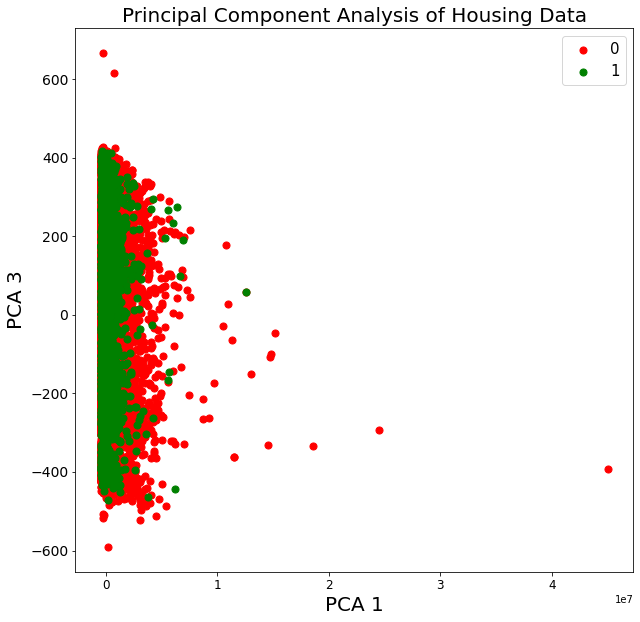

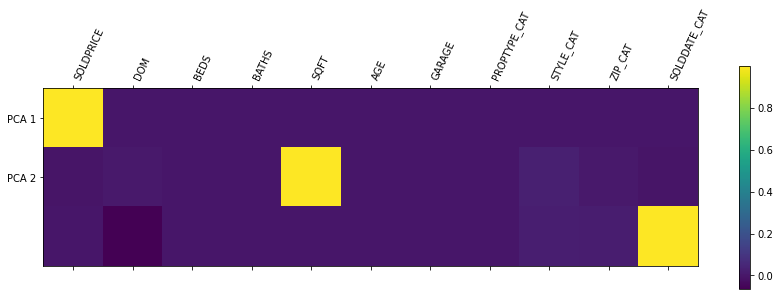

[9.99992496e-01 7.25051406e-06 2.53225438e-07]


In [310]:
# using help from guide here: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(x)
pca_df = pd.DataFrame(data = pca_fit, columns = ['PCA 1', 'PCA 2', 'PCA 3'])

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PCA 1',fontsize=20)
plt.ylabel('PCA 3',fontsize=20)
plt.title("Principal Component Analysis of Housing Data",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['FLIPPABLE'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'PCA 1'], 
                pca_df.loc[indicesToKeep, 'PCA 3'], 
                c = color, s = 50)

plt.legend(targets,prop={'size': 15})

# from here: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['PCA 1','PCA 2','PCA 3'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(x_names)),x_names,rotation=65,ha='left')
plt.show()

# explained variance
x_pca=pca.transform(x)
ex_variance=np.var(x_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faff2456460>,
      dtype=object)

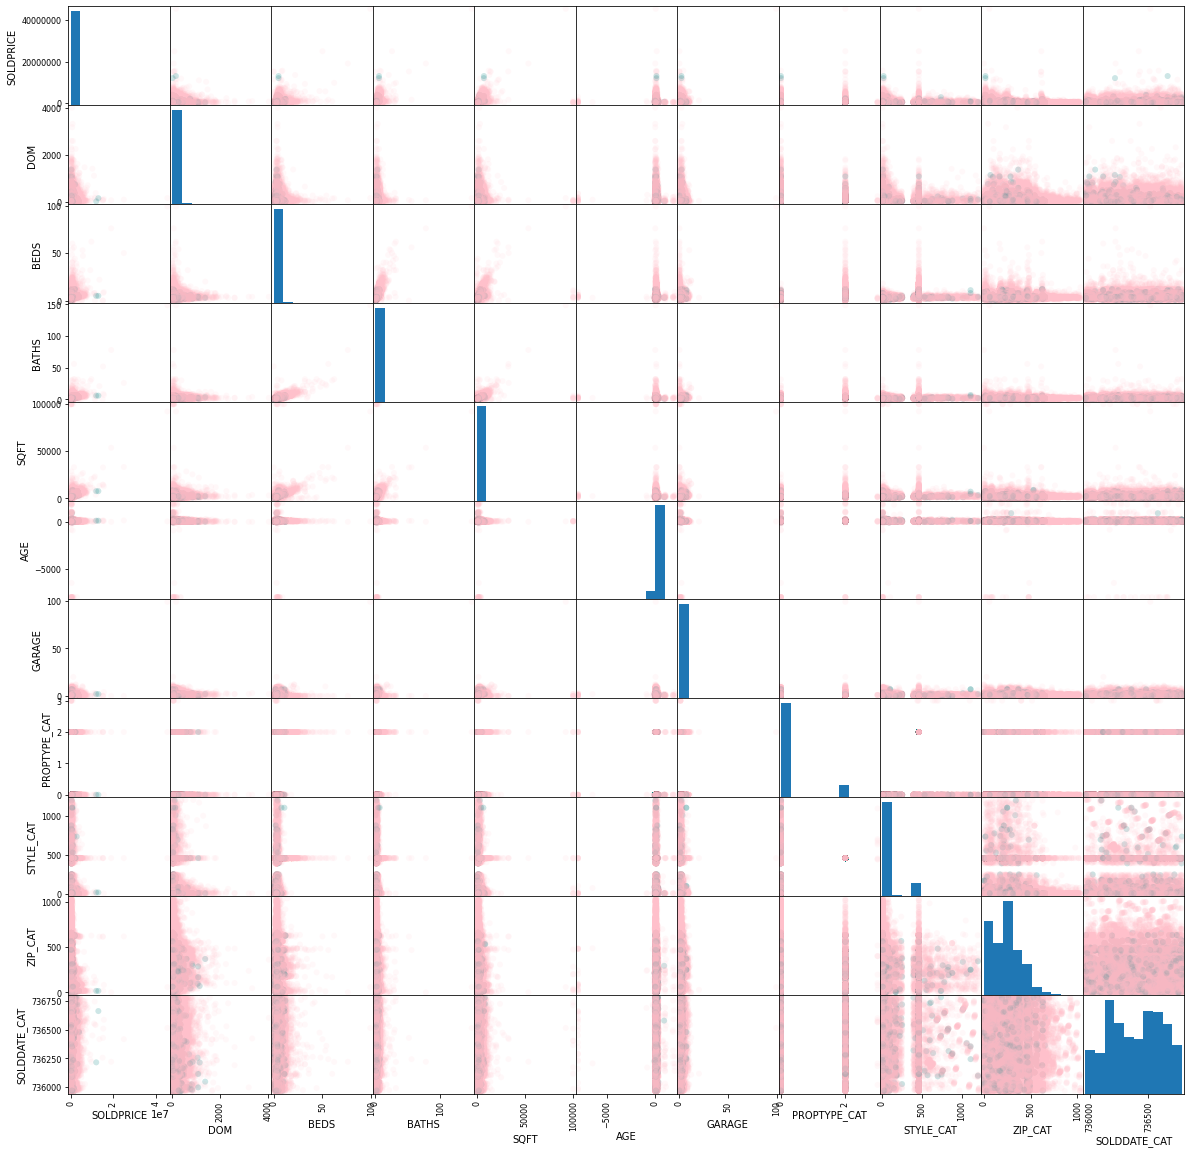

In [311]:
from pandas.plotting import scatter_matrix
%matplotlib inline

#learned this from https://stackoverflow.com/questions/28034424/pandas-scatter-matrix-plot-categorical-variables
colors=['pink','teal']
scatter_matrix(x, figsize=[20,20], marker='o', alpha=0.1, c=df.FLIPPABLE.apply(lambda x:colors[x]))

In [312]:
# Use train/test/split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
print(x_train.shape)
print(x_test.shape)

# uncomment to try with PCA transformed data
# pca = PCA(n_components=3)
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)

# uncomment to try with SMOTE oversampling
#sm = SMOTE(random_state=2)
#x_train, y_train = sm.fit_sample(x_train, y_train)


(89361, 11)
(44014, 11)


In [313]:
x_train.head()

,SOLDPRICE,DOM,BEDS,BATHS,SQFT,AGE,GARAGE,PROPTYPE_CAT,STYLE_CAT,ZIP_CAT,SOLDDATE_CAT
91660,195000.0,22,3,1.0,1084,67,0,0,29,236,736303
30784,312366.0,52,3,1.0,1647,138,1,0,3,73,736443
124918,1795000.0,25,4,2.5,4200,53,2,0,0,91,736110
39771,330000.0,342,3,1.0,1163,112,0,0,33,272,736636
30614,3560000.0,36,5,7.0,7185,10,3,0,22,20,736440


# Logistic Regression

In [292]:
# logistic regression w/test train split
from sklearn.linear_model import LogisticRegression

lm = linear_model.LogisticRegression()
lm_fit = lm.fit(x_train, y_train.values.ravel())
y_pred_lm = lm.predict(x_test)

print(classification_report(y_test, y_pred_lm, zero_division=1))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97     41523
        True       1.00      0.00      0.00      2491

    accuracy                           0.94     44014
   macro avg       0.97      0.50      0.49     44014
weighted avg       0.95      0.94      0.92     44014



In [219]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_lm),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,19838,21643
True Flippable,804,1729


# Decision Tree Classifier

In [293]:
from sklearn.tree import DecisionTreeClassifier

tm = DecisionTreeClassifier()
tm_fit = tm.fit(x_train, y_train)
y_pred_tm = tm.predict(x_test)

print(tm.tree_.max_depth)
print(classification_report(y_test, y_pred_tm, zero_division=1))

50
              precision    recall  f1-score   support

       False       0.98      0.96      0.97     41523
        True       0.50      0.69      0.58      2491

    accuracy                           0.94     44014
   macro avg       0.74      0.82      0.77     44014
weighted avg       0.95      0.94      0.95     44014



In [294]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_tm),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,39800,1723
True Flippable,780,1711


In [60]:
joblib.dump(tm, 'tm_untuned.pkl')

['tm_untuned.pkl']

# LDA and QDA

In [222]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_fit = lda.fit(x_train, y_train.values.ravel())

print(lda_fit.priors_) # prior possibilities of either outcome
print(lda_fit.means_)
print(lda_fit.coef_)

y_pred_lda=lda_fit.predict(x_test)
print(np.unique(y_pred_lda, return_counts=True))
print(classification_report(y_test, y_pred_lda, zero_division=1))

[0.5 0.5]
[[4.61711319e+05 7.28657345e+01 3.66912166e+00 2.16638796e+00
  2.14208152e+03 6.52884912e+01 1.07204867e+00 2.31990797e-01
  7.09796722e+01 2.43456379e+02 7.36387630e+05]
 [3.61988796e+05 5.95804455e+01 3.15622999e+00 1.84301657e+00
  1.78249717e+03 7.17705116e+01 5.40987689e-01 1.00642805e-01
  4.59896582e+01 2.35448860e+02 7.36397713e+05]]
[[-2.86360613e-07 -9.84393490e-04 -2.38284781e-01  1.14566699e-01
   6.95116161e-05  3.80958330e-04 -6.74947134e-01 -7.04933325e-01
   1.29516034e-03 -6.33257598e-04  2.98556686e-04]]
(array([False,  True]), array([26258, 17756]))
              precision    recall  f1-score   support

       False       0.95      0.60      0.74     41481
        True       0.08      0.53      0.13      2533

    accuracy                           0.60     44014
   macro avg       0.52      0.57      0.44     44014
weighted avg       0.90      0.60      0.71     44014



In [223]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_lda),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,25075,16406
True Flippable,1183,1350


In [224]:
qda = QuadraticDiscriminantAnalysis()
qda_fit = qda.fit(x_train, y_train.values.ravel())

print(qda_fit.priors_) # prior possibilities of either outcome
print(qda_fit.means_)

y_pred_qda=qda_fit.predict(x_test)
print(np.unique(y_pred_qda, return_counts=True))
print(classification_report(y_test, y_pred_qda, zero_division=1))

[0.5 0.5]
[[4.61711319e+05 7.28657345e+01 3.66912166e+00 2.16638796e+00
  2.14208152e+03 6.52884912e+01 1.07204867e+00 2.31990797e-01
  7.09796722e+01 2.43456379e+02 7.36387630e+05]
 [3.61988796e+05 5.95804455e+01 3.15622999e+00 1.84301657e+00
  1.78249717e+03 7.17705116e+01 5.40987689e-01 1.00642805e-01
  4.59896582e+01 2.35448860e+02 7.36397713e+05]]
(array([False,  True]), array([12817, 31197]))
              precision    recall  f1-score   support

       False       0.96      0.30      0.45     41481
        True       0.07      0.80      0.12      2533

    accuracy                           0.33     44014
   macro avg       0.51      0.55      0.29     44014
weighted avg       0.91      0.33      0.43     44014



In [225]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_qda),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,12323,29158
True Flippable,494,2039


# KNN

In [226]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn_fit = knn.fit(x_train, y_train.values.ravel())

y_pred_knn = knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       False       0.98      0.84      0.91     41481
        True       0.22      0.73      0.34      2533

    accuracy                           0.84     44014
   macro avg       0.60      0.79      0.62     44014
weighted avg       0.94      0.84      0.87     44014



In [227]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_knn),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,35014,6467
True Flippable,678,1855


Text(0, 0.5, 'Error')

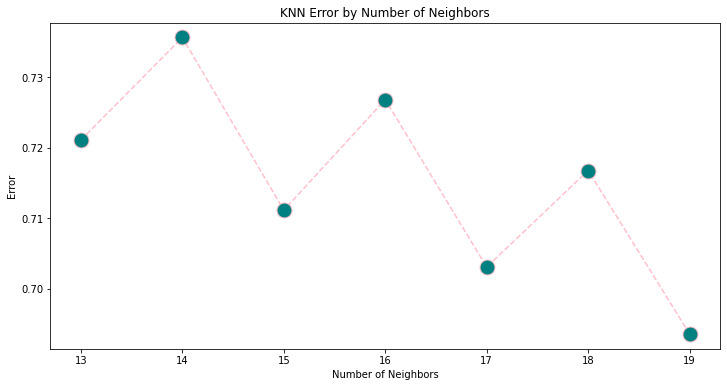

In [92]:
from sklearn.metrics import zero_one_loss

error = []
for i in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.values.ravel())
    pred_i = knn.predict(x_test)
    accuracy = zero_one_loss(y_test, pred_i)
    error.append(1 - accuracy)
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 7), error, color='pink', linestyle='dashed', marker='o',
         markerfacecolor='teal', markersize=15)
plt.title('KNN Error by Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')

# Support Vector Machine

In [ ]:
# Parameter tuning needs to be done not on a laptop, it takes forever. 

# I've commented out all the gridsearch code and will tune the models later
# For this and ensemble methods I found this helpful: 
# https://www.datasklr.com/select-classification-methods/support-vector-machines

# from sklearn.model_selection import GridSearchCV

# for gridsearch I want to split our data a bit more:
# df1, df2, df3 = np.split(df.sample(frac=1), [int(.33*len(df)), int(.7*len(df))])

# print(df1.shape)
# print(df2.shape)
# print(df3.shape)

# y_1 = df1[y_names]
# x_1 = df1[x_names]
# y_2 = df2[y_names]
# x_2 = df2[x_names]
# y_3 = df3[y_names]
# x_3 = df3[x_names]

# x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.33)
# x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.33)
# x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=0.33)

In [192]:
# from sklearn import svm
# from sklearn.svm import SVC
# from sklearn.svm import LinearSVC

# svc = SVC()
# svc.fit(x_train, y_train.values.ravel())
# y_pred_svc = svc.predict(x_test)
# print(classification_report(y_test, y_pred_svc, zero_division=1))

In [ ]:
# pd.DataFrame(
#     confusion_matrix(y_test, y_pred_svc),
#     columns=['Predicted Not Flippable', 'Predicted Flippable'],
#     index=['True Not Flippable', 'True Flippable']
# )

In [14]:
# estimator_SVM = SVC(gamma='scale')
# parameters_SVM = {
#     'C': (0.1, 15.0, 0.1),
#     'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
#     'coef0': (0.0, 10.0, 1.0),
#     'shrinking': (True, False),
# }

# # with GridSearch
# grid_search_SVM = GridSearchCV(
#     estimator=estimator_SVM,
#     param_grid=parameters_SVM,
#     scoring = 'accuracy',
#     n_jobs = -1,
#     cv = 5
# )

# SVM_1 = grid_search_SVM.fit(x_train_1, y_train_1.values.ravel())
# y_pred_SVM1 = SVM_1.predict(x_test_1)
# SVM_2 = grid_search_SVM.fit(x_train_2, y_train_2.values.ravel())
# y_pred_SVM2 = SVM_2.predict(x_test_2)
# SVM_3 = grid_search_SVM.fit(x_train_3, y_train_3.values.ravel())
# y_pred_SVM3 = SVM_3.predict(x_test_3)

# print(grid_search_SVM.best_params_)

# print('Accuracy Score - SVM - Default:', metrics.accuracy_score(y_test, y_pred_svc))  
# print('Accuracy Score - SVM - Poly = 1:', metrics.accuracy_score(y_test_1, y_pred_SVM1)) 
# print('Accuracy Score - SVM - Poly = 2:', metrics.accuracy_score(y_test_2, y_pred_SVM2)) 
# print('Accuracy Score - SVM - Poly = 3:', metrics.accuracy_score(y_test_3, y_pred_SVM3)) 

# Ensemble (Bagging, Boosting, Random Forest)

No parameter tuning on these either - this will check the vanilla models and later we can tune the ones that do well.

## Random Forest

In [314]:
from sklearn.ensemble import RandomForestClassifier

# Add the params below to try with tuned random forest
# random_state=50, n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=40, bootstrap='False'
rf = RandomForestClassifier(random_state=50)
rf_fit = rf.fit(x_train, y_train.values.ravel())
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf, zero_division=1))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99     41448
        True       1.00      0.68      0.81      2566

    accuracy                           0.98     44014
   macro avg       0.99      0.84      0.90     44014
weighted avg       0.98      0.98      0.98     44014



In [315]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_rf),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,41444,4
True Flippable,833,1733


In [143]:
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# print("working...")
# # Fit the random search model
# rf_random.fit(x_train, y_train)
# print("working...")

working...
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 82.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 190.4min finished
/opt/anaconda3/envs/mylabenv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


working...


In [144]:
# rf_random.best_params_

{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}

In [ ]:
joblib.dump(rf, 'rf_full.pkl')

## Boosting

In [230]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB_fit = GB.fit(x_train, y_train.values.ravel())
y_pred_GB = GB.predict(x_test)
print(classification_report(y_test, y_pred_GB, zero_division=1))

              precision    recall  f1-score   support

       False       0.95      0.92      0.93     41481
        True       0.16      0.25      0.19      2533

    accuracy                           0.88     44014
   macro avg       0.55      0.58      0.56     44014
weighted avg       0.91      0.88      0.89     44014



In [231]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_GB),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,37980,3501
True Flippable,1889,644


In [232]:
from sklearn.ensemble import AdaBoostClassifier

ADB = AdaBoostClassifier()
ADB_fit = ADB.fit(x_train, y_train.values.ravel())
y_pred_ADB = ADB.predict(x_test)

print(classification_report(y_test, y_pred_ADB, zero_division=1))

              precision    recall  f1-score   support

       False       0.95      0.76      0.85     41481
        True       0.09      0.38      0.15      2533

    accuracy                           0.74     44014
   macro avg       0.52      0.57      0.50     44014
weighted avg       0.90      0.74      0.81     44014



In [233]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_ADB),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,31640,9841
True Flippable,1559,974


In [234]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB_fit = XGB.fit(x_train, y_train.values.ravel())
y_pred_XGB = XGB.predict(x_test)
print(classification_report(y_test, y_pred_XGB, zero_division=1))

              precision    recall  f1-score   support

       False       0.95      0.95      0.95     41481
        True       0.23      0.25      0.24      2533

    accuracy                           0.91     44014
   macro avg       0.59      0.60      0.60     44014
weighted avg       0.91      0.91      0.91     44014



In [235]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_XGB),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,39353,2128
True Flippable,1895,638


## Bagging

In [236]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier()
bag_fit = bag.fit(x_train, y_train.values.ravel())
y_pred_bag = bag.predict(x_test)
print(classification_report(y_test, y_pred_bag, zero_division=1))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98     41481
        True       0.66      0.62      0.64      2533

    accuracy                           0.96     44014
   macro avg       0.82      0.80      0.81     44014
weighted avg       0.96      0.96      0.96     44014



In [237]:
pd.DataFrame(
    confusion_matrix(y_test, y_pred_bag),
    columns=['Predicted Not Flippable', 'Predicted Flippable'],
    index=['True Not Flippable', 'True Flippable']
)

,Predicted Not Flippable,Predicted Flippable
True Not Flippable,40683,798
True Flippable,968,1565
